<h1 align="center">CS550: Machine Learning</h1>
<h2 align="center">Assignment 1: Question 1</h2>
<h3>Submitted by:-</h3>
<h6>NEELMANI GAUTAM - 11640590</h6>

# Medical Cost Personal Datasets

# Table of Content

1. [Import Modules, Define Constants and Initialize Notebook](#1)<br><br>
2. [Import and Clean Data](#2)<br><br>
3. [Exploratory Data Analysis](#3)<br>
    3.1 [Descriptive Analysis](#3.1)<br>
    3.2 [Graphical Analysis](#3.2)<br>
      &emsp;3.2.1 [Numeric Data Analysis](#3.2.1)<br>
      &emsp;3.2.2 [Numeric vs Categorical Data Analysis](#3.2.2)<br>
      &emsp;3.2.3 [Categorical Data Analysis](#3.2.3)<br><br>
4. [Machine Learning](#4)<br>
    4.1 [Preprocessing Data](#4.1)<br>
    4.2 [Divide Dataset into Training, Cross-Validation and Testing Data*](#4.2)<br>
      &emsp;4.2.1 [Holdout Method with Random Sampling*](#4.2.1)<br>
      &emsp;4.2.2 [Stratified Holdout Method*](#4.2.2)<br>
      &emsp;4.2.3 [Stratified K-Folds Cross-Validation*](#4.2.3)<br>
      &emsp;4.2.4 [Bootstrapping*](#4.2.4)<br>
    4.3 [Model Selection using Stratified K-Fold Cross-Validation](#4.3)<br>
    4.4 [Feature Selection](#4.4)<br>
      &emsp;4.4.1 [Ranking Features on the basis of Model Coefficients](#4.4.1)<br>
      &emsp;4.4.2 [Recursive Feature Elimination (RFE) using Stratified K-Fold Cross-Validation](#4.4.2)<br>
    4.5 [Hyperparameter Tuning using Grid Search](#4.5)<br><br>
5. [Final Model](#5)<br>

#### Note: We are using Mean Absolute Error (MAE) because it is less senstive to outlier and give error in units of target variable.

## 1. Import Modules, Define Constants and Initialize Notebook
<a id="1"></a>

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFECV

%matplotlib inline
np.random.seed(42)

# Constants:
RANDOM_SEED = 42
TEST_RATIO = 0.2
VAL_RATIO = 0.2
CV_FOLDS = 5

/home/nmg/PyEnvs/ml/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 2. Import and Clean Data
<a id="2"></a>

In [3]:
# Read the file:
file = "./insurance.csv"
dataset = pd.read_csv(file, na_values=[" "])

In [4]:
# Looking into dataset:
dataset.info()

display(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Number of nulls in each feature column of dataset:
display(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- No null data point

## 3. Exploratory Data Analysis
<a id="3"></a>

### 3.1 Discriptive Analysis
<a id="3.1"></a>

In [6]:
# Split the dataset into numeric and categorical to facilitate the analysis:
numData = dataset.select_dtypes(include=['float64', 'int64'])
catData = dataset.select_dtypes(exclude=['float64', 'int64'])

#### 3.1.1 Numeric Data
<a id="3.1.1"></a>

In [7]:
display(numData.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 3.1.1 Categorical Data
<a id="3.1.1"></a>

In [8]:
display(catData.describe())

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### 3.2 Graphical Analysis
<a id="3.2"></a>

#### 3.2.1 Numeric Data Analysis
<a id="3.2.1"></a>

- In this part we will look into our numerical variables, how they are distributed, how they relate with each other and how they can help us to predict the 'charges' variable.

[]

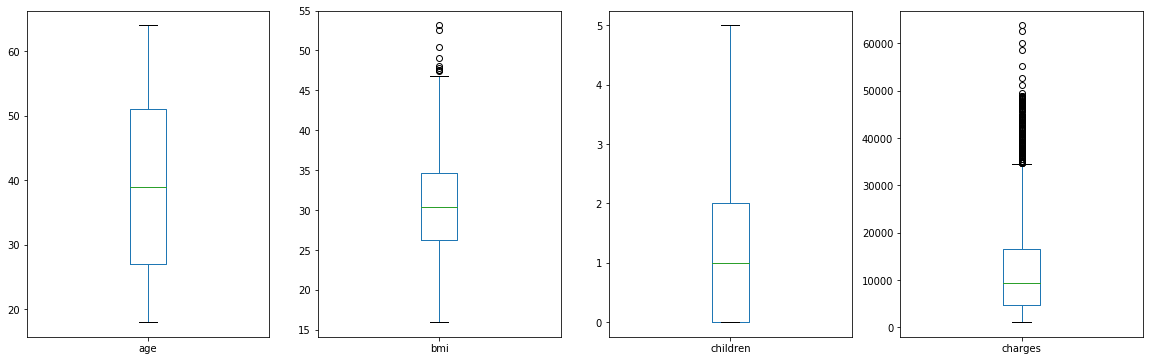

In [9]:
# Box plots:
numData.plot(kind='box', subplots=True, figsize=(20, 6))
plt.plot()

- From above we observe that our dataset has outliers in 'bmi' and 'charges'.

[]

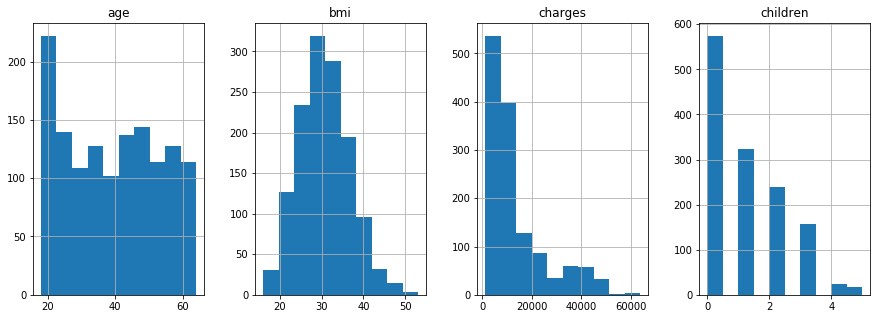

In [10]:
# Histogram plots:
numData.hist(layout=(1,4), figsize=(15,5))
plt.plot()

- The box plot and histogram shows us that 'age', 'charges', 'children' are not normally distributed. I will check how they are related to each other.

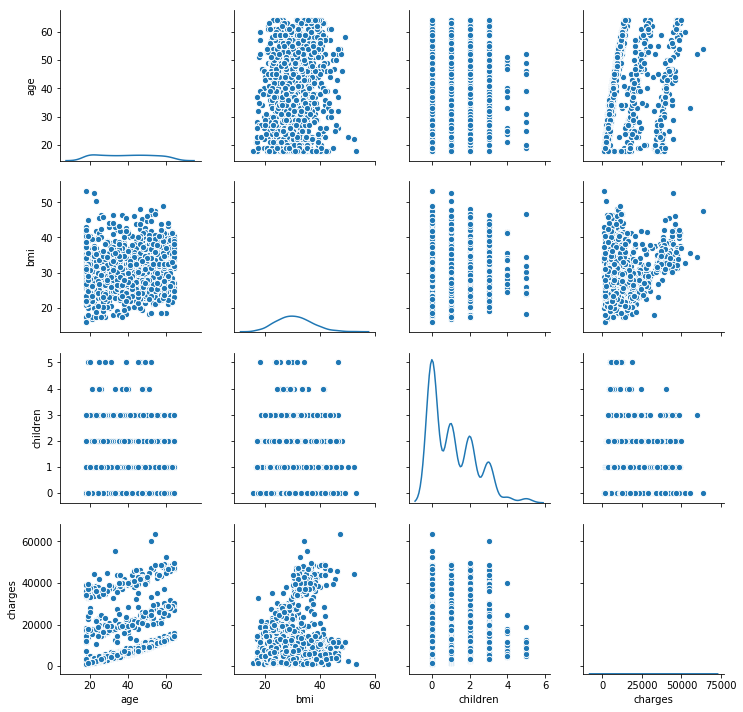

In [11]:
#Scatter plot on off-diagonal axes and KDE plot on diagonal:
numGrd = sns.PairGrid(numData.sample(n=1000))
numGrd = numGrd.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
numGrd = numGrd.map_diag(sns.kdeplot)
numGrd = numGrd.add_legend()

#### 3.2.2 Numeric vs Categorical Data Analysis
<a id="3.2.2"></a>

- I will use Violine Plot to analyse the numerical variables compared to the categorical variables.

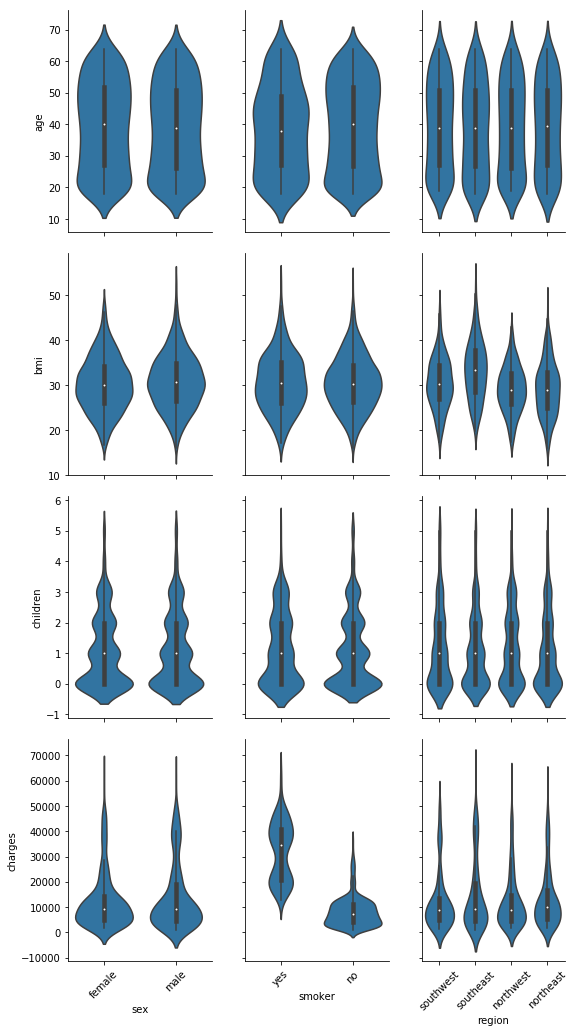

In [12]:
numCatGrd = sns.PairGrid(dataset, x_vars=catData.columns.values,
                         y_vars=numData.columns.values, aspect=.75, height=3.5)
for ax in numCatGrd.axes.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
numCatGrd.map(sns.violinplot)

#### 3.2.3 Categorical Data Analysis
<a id="3.2.3"></a>

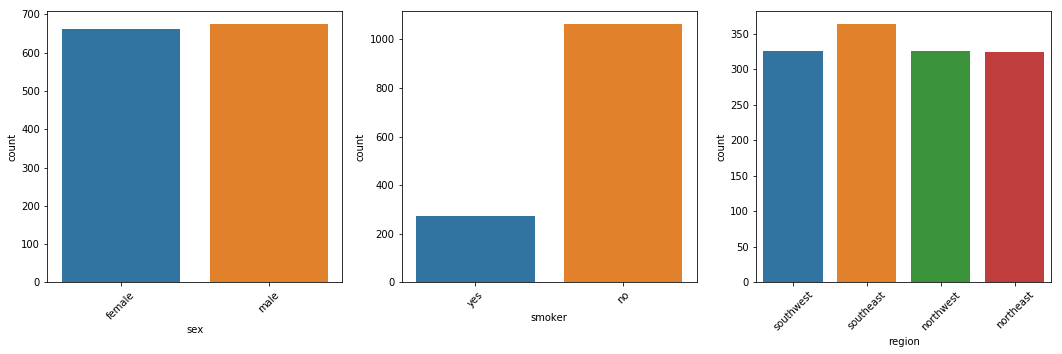

In [13]:
#Count plot:-
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(catData.columns):
    numCatGrd = sns.countplot(x=catData[column], ax=ax[i])
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

- We see from above that distribution of smoker is skewed.

## 4. Machine Learning
<a id="4"></a>

### 4.1 Preprocessing Data
<a id="4.1"></a>

In [14]:
# One-Hot encoding:
Data = pd.get_dummies(dataset, drop_first=True)
Data.info()
display(Data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_male            1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.4 KB


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


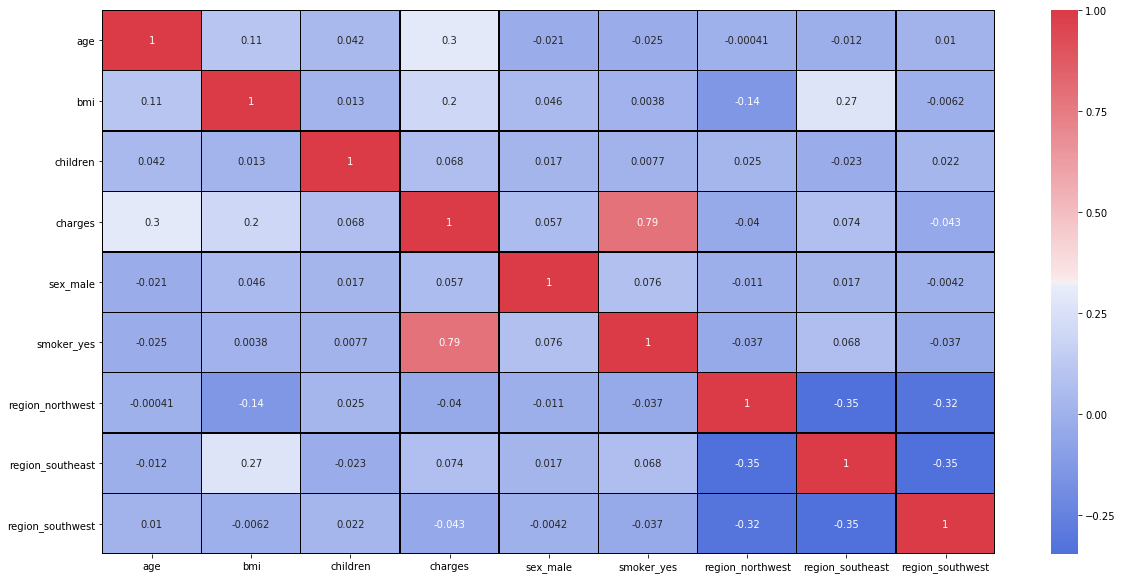

In [15]:
# Correlation matrix:
corr = Data.corr()

# Visulization of correlation matrix as Heat Map:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True), annot=True,
            linewidths=0.5, linecolor='black', square=False, ax=ax)

- We observe from above that our target variable 'charges' is highly correlated with 'smoker_yes'.

In [16]:
# Target variable 'charges' as numpy array 'Y':
Y = Data['charges'].values

# Input Features:
X = Data.drop(['charges'], axis=1)

# Storing names of X's features:
xFeatures = X.columns
xFeatures

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [17]:
# Scale numerical features('age', 'bmi' & 'children') of X to zero mean and unit variance:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = np.concatenate((scaler.fit_transform(X[['age', 'bmi', 'children']].values),
                    X.drop(['age', 'bmi', 'children'], axis=1).values), axis=1)

### 4.2 Divide Dataset into Training, Cross-Validation and Testing Data
<a id="4.2"></a>

#### 4.2.1 Holdout Method with Random Sampling
<a id="4.2.1"></a>

In [18]:
X_trainHold, X_testHold, Y_trainHold, Y_testHold = train_test_split(X, Y, test_size=TEST_RATIO,
                                                                    random_state=RANDOM_SEED)

X_trainHold, X_valHold, Y_trainHold, Y_valHold = train_test_split(X_trainHold, Y_trainHold,
                                                                  test_size=VAL_RATIO, random_state=RANDOM_SEED)

#### 4.2.2 Stratified Holdout Method
<a id="4.2.2"></a>

###### Stratify w.r.t. 'smoker_yes' as it is very important feature for prediction and it is skewed.

In [19]:
X_trainStrat, X_testStrat, Y_trainStrat, Y_testStrat = train_test_split(X, Y, test_size=TEST_RATIO,
                                                                        random_state=RANDOM_SEED, stratify=X[:, 4])

X_trainStrat, X_valStrat, Y_trainStrat, Y_valStrat = train_test_split(X_trainStrat, Y_trainStrat,
                                                                      test_size=VAL_RATIO, random_state=RANDOM_SEED,
                                                                      stratify=X_trainStrat[:, 4])

#### 4.2.3 Stratified K-Folds Cross-Validation
<a id="4.2.3"></a>

In [20]:
X_trainKFold, X_testKFold, Y_trainKFold, Y_testKFold = train_test_split(X, Y, test_size=TEST_RATIO,
                                                                        random_state=RANDOM_SEED, stratify=X[:, 4])

skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_SEED)
X_cvKFold, Y_cvKFold = list(), list()

for train_index, val_index in skf.split(X_trainKFold, X_trainKFold[:, 4]):
    X_cvKFold.append((X[train_index], X[val_index]))
    Y_cvKFold.append((Y[train_index], Y[val_index]))

#### 4.2.4 Bootstrapping
<a id="4.2.4"></a>

In [21]:
for train_index, test_index in ShuffleSplit(n_splits=1, test_size=TEST_RATIO, random_state=RANDOM_SEED).split(X, Y):
    X_trainBStrap, X_testBStrap = X[train_index], X[test_index]
    Y_trainBStrap, Y_testBStrap = Y[train_index], Y[test_index]

for train_index, test_index in ShuffleSplit(n_splits=1, test_size=VAL_RATIO,
                                            random_state=RANDOM_SEED).split(X_trainBStrap, Y_trainBStrap):
    X_trainBStrap, X_valBStrap = X[train_index], X[test_index]
    Y_trainBStrap, Y_valBStrap = Y[train_index], Y[test_index]

### 4.3 Model Selection using Stratified K-Fold Cross-Validation
<a id="4.3"></a>

In [22]:
scoring = 'neg_mean_absolute_error'

models = [
    ('Linear Regression', LinearRegression(n_jobs=-1)),

    ('Elastic Net', ElasticNet(alpha=1e-1, l1_ratio=1, precompute=True, max_iter=1000, tol=1e-4,
                               random_state=RANDOM_SEED)),

    ('Bayesian Ridge', BayesianRidge(n_iter=300, tol=1e-4, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06,
                                     lambda_2=1e-06, compute_score=True)),

    ('K-Neighbors Regressor', KNeighborsRegressor(n_neighbors=3, weights='uniform', n_jobs=-1)),

    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, criterion='mae', max_depth=4,
                                                      max_features='auto', n_jobs=-1, random_state=RANDOM_SEED)),
    ('SVR', SVR(kernel='rbf', gamma=1e-2, tol=1e-3, C=1e7, epsilon=1e-2, max_iter=100000)),
    ('MLP Regressor', MLPRegressor(hidden_layer_sizes=(10, 5), alpha=1e-1, learning_rate_init=1e-2,
                                   max_iter=1000, random_state=RANDOM_SEED, tol=1e-6))
]

In [23]:
results = dict()
for name, model in models:
    cv_results = cross_validate(model, X_trainKFold, Y_trainKFold, scoring=scoring,
                                cv=skf.split(X_trainKFold, X_trainKFold[:, 4]), n_jobs=-1, return_train_score=True)
    results[name] = cv_results
    print("\nFor {}:-".format(name))
    for result in cv_results:
        print("\t{}: {}".format(result, np.mean(cv_results[result])))

results = pd.DataFrame(results)


For Linear Regression:-
	fit_time: 0.003341007232666016
	score_time: 0.000632619857788086
	test_score: -4239.824724084117
	train_score: -4211.238749502391

For Elastic Net:-
	fit_time: 0.0024426460266113283
	score_time: 0.0006886482238769531
	test_score: -4239.850142307698
	train_score: -4211.256242497309

For Bayesian Ridge:-
	fit_time: 0.005361032485961914
	score_time: 0.0007818222045898437
	test_score: -4246.7567076862015
	train_score: -4217.647035890824

For K-Neighbors Regressor:-
	fit_time: 0.0023291587829589845
	score_time: 0.11158294677734375
	test_score: -3782.9713624948236
	train_score: -2523.9163481326677

For Random Forest Regressor:-
	fit_time: 1.955022430419922
	score_time: 0.1074944019317627
	test_score: -2067.320051321124
	train_score: -1946.9746012815872

For SVR:-
	fit_time: 4.330865383148193
	score_time: 0.011881208419799805
	test_score: -1990.702310096854
	train_score: -1914.4493671665819

For MLP Regressor:-
	fit_time: 3.564350128173828
	score_time: 0.000647783279

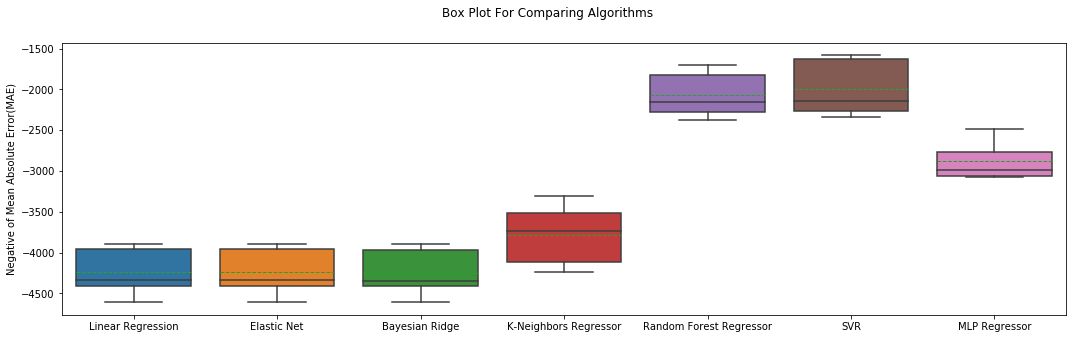

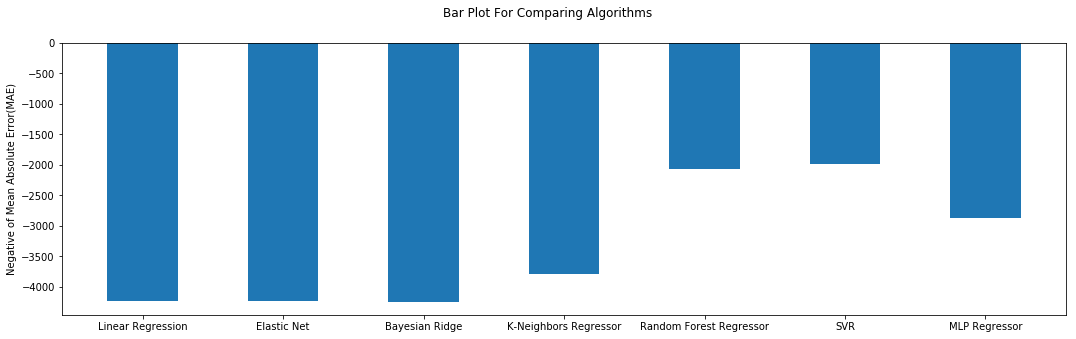

In [24]:
#Compare Algorithms:
fig, ax = plt.subplots(figsize=(18, 5))
fig.suptitle("Box Plot For Comparing Algorithms")
plt.ylabel("Negative of Mean Absolute Error(MAE)")
sns.boxplot(y=list(results.iloc[2]), x=list(results.columns), ax=ax, showmeans=True, meanline=True)
plt.plot()
plt.savefig('error_graph_Box_Plot.png')

fig, ax = plt.subplots(figsize=(18, 5))
fig.suptitle("Bar Plot For Comparing Algorithms")
plt.ylabel("Negative of Mean Absolute Error(MAE)")
plt.bar(x=list(results.columns), height=np.mean(list(results.iloc[2]), axis=1), width=0.5)
plt.plot()
plt.savefig('error_graph_Bar_Plot.png')

###### We observe from above graph that both Support Vector Regressor (SVR) and Random Forest Regressor gives almost equal error which is very less compared to other models. But since Random Forest Regressor is simpler and easy to tune, so we select Random Forest Regressor as our model for regression.

Stats on Test Data for Random Forest Regressor :-

Mean Absolute Error(MAE) for Random Forest Regressor on Test Data: 1867.1896212748138

Coefficient of determination(R^2) score for Random Forest Regressor on Test Data: 0.8746850892132021



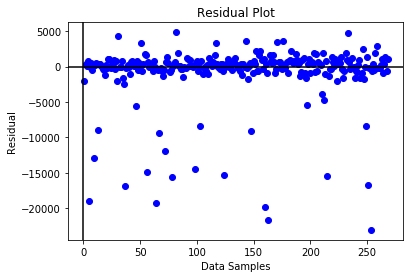

In [25]:
# Predictions on Test Data:

modelName, modelSelected = models[4]
print("Stats on Test Data for", modelName, ":-\n")
modelSelected.fit(X_trainKFold, Y_trainKFold)
predictions = modelSelected.predict(X_testKFold)
print("Mean Absolute Error(MAE) for {} on Test Data: {}\n".format(modelName, mean_absolute_error
                                                                             (Y_testKFold, predictions)))
print("Coefficient of determination(R^2) score for {} on Test Data: {}\n".format(modelName, modelSelected.score
                                                                                (X_testKFold, Y_testKFold)))
#Residual Plot:
fig, ax = plt.subplots()
ax.scatter(np.arange(1, len(Y_testKFold)+1), predictions-Y_testKFold, color='blue')
ax.set_title("Residual Plot")
ax.set_xlabel("Data Samples")
ax.set_ylabel("Residual")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot()
plt.show()

### 4.4 Feature Selection
<a id="4.4"></a>

#### 4.4.1 Ranking Features on the basis of Model Coefficients
<a id="4.4.1"></a>

In [26]:
# Using random forest regressor to find feature importance:
coefs = np.std(X_trainKFold, 0)*modelSelected.feature_importances_
feature_imp = pd.DataFrame(coefs)
feature_imp.columns=["Importance"]
feature_imp["Features"] = xFeatures
feature_imp.sort_values("Importance", inplace=True, ascending=False)
display(feature_imp)

,Importance,Features
0,0.358996,age
1,0.202449,bmi
4,0.173601,smoker_yes
2,0.006145,children
3,0.000025,sex_male
5,0.000000,region_northwest
6,0.000000,region_southeast
7,0.000000,region_southwest


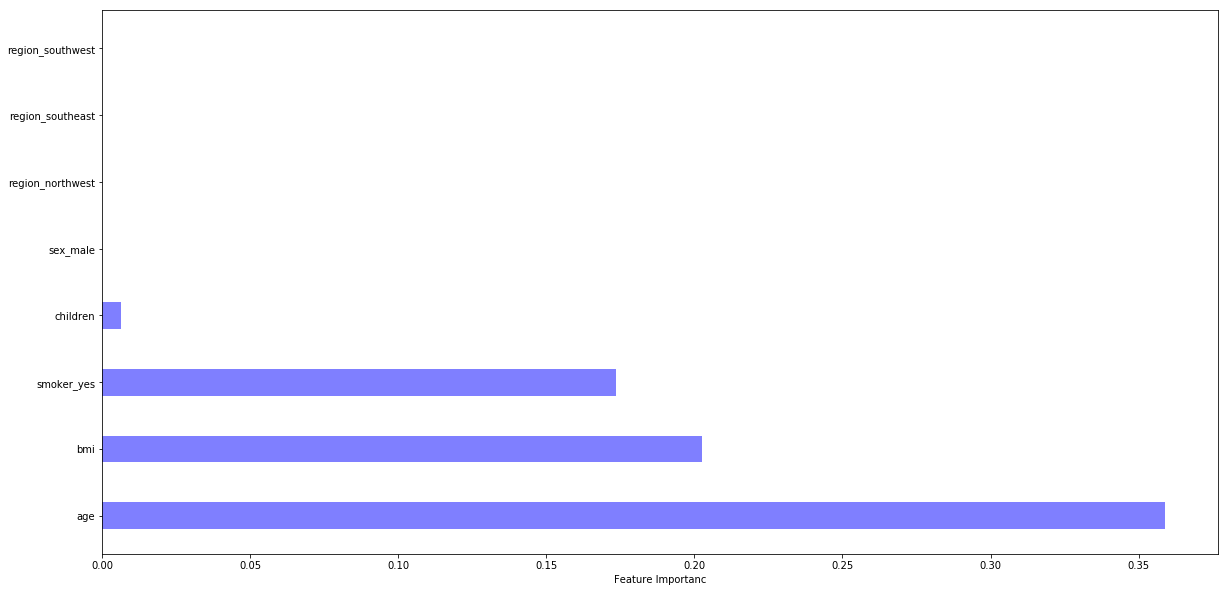

In [27]:
index = np.arange(len(feature_imp))
fig = plt.figure(figsize=(20,10))
rects = plt.barh(y=feature_imp["Features"] , width=feature_imp["Importance"],
                 height=0.4, alpha=0.5, color='b', label='Main')
plt.xlabel("Feature Importanc")
plt.show()

- From above we can observe that 'age', 'bmi' and 'smoker_yes' are most important features

#### 4.4.2 Recursive Feature Elimination (RFE) using Stratified K-Fold Cross-Validation
<a id="4.4.2"></a>

In [28]:
rfecv = RFECV(estimator=modelSelected, step=1, cv=skf.split(X_trainKFold, X_trainKFold[:, 4]),
              scoring=scoring, verbose=0, n_jobs=-1)
rfecv.fit(X_trainKFold, Y_trainKFold)

print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 5


In [29]:
print("Feature Ranking(all selected features are ranked 1): ", rfecv.ranking_)
print("\nName of Selected Features:-\n", xFeatures[rfecv.support_])

Feature Ranking(all selected features are ranked 1):  [1 1 1 1 1 4 3 2]

Name of Selected Features:-
 Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes'], dtype='object')


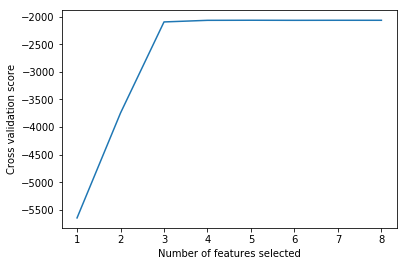

In [30]:
# Plot number of features VS. cross-validation scores:
fig, ax = plt.subplots()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

- Using Recursive Feature Elimination (RFE), we select 'age', 'bmi', 'children', 'sex_male' and 'smoker_yes'.

Stats on Test Data for Random Forest Regressor :-

Mean Absolute Error(MAE) for Random Forest Regressor on Test Data: 1866.704817299067

Coefficient of determination(R^2) score for Random Forest Regressor on Test Data: 0.8746079146239238



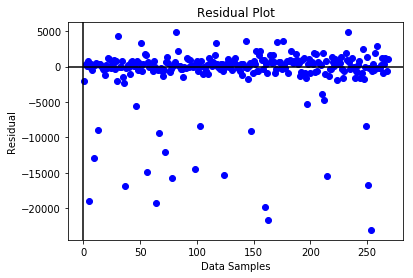

In [31]:
# Selecting features according to RFE:
X_trainRFE, X_testRFE = X_trainKFold[:, rfecv.support_], X_testKFold[:, rfecv.support_]

print("Stats on Test Data for", modelName, ":-\n")
modelSelected.fit(X_trainRFE, Y_trainKFold)
predictions = modelSelected.predict(X_testRFE)
print("Mean Absolute Error(MAE) for {} on Test Data: {}\n".format(modelName, mean_absolute_error
                                                                             (Y_testKFold, predictions)))
print("Coefficient of determination(R^2) score for {} on Test Data: {}\n".format(modelName, modelSelected.score
                                                                                (X_testRFE, Y_testKFold)))
#Residual Plot:
fig, ax = plt.subplots()
ax.scatter(np.arange(1, len(Y_testKFold)+1), predictions-Y_testKFold, color='blue')
ax.set_title("Residual Plot")
ax.set_xlabel("Data Samples")
ax.set_ylabel("Residual")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot()
plt.show()

### 4.5 Hyperparameter Tuning using Grid Search
<a id="4.5"></a>

In [32]:
gscv = GridSearchCV(estimator=modelSelected, param_grid={'n_estimators':np.arange(100, 501, 200),
                                                         'max_features':[2, 3, 4, 5],
                                                         'max_depth':np.arange(2, 7, 1)}, scoring=scoring,
                    n_jobs=-1, cv=skf.split(X_trainKFold, X_trainKFold[:, 4]), verbose=0, return_train_score=True)

gscv.fit(X_trainRFE, Y_trainKFold)

print("Tuned hyperparameters:-\n", gscv.best_params_)
print("\nBest test score:", gscv.best_score_)
modelSelected = gscv.best_estimator_

Tuned hyperparameters:-
 {'max_depth': 5, 'max_features': 4, 'n_estimators': 300}

Best test score: -1919.6421561128075


## 5. Final Model
<a id="5"></a>


Stats on Test Data for final model:-

	 RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Mean Absolute Error(MAE) for Random Forest Regressor on Test Data: 1701.1043970332714

Coefficient of determination(R^2) score for Random Forest Regressor on Test Data: 0.8780433219035557



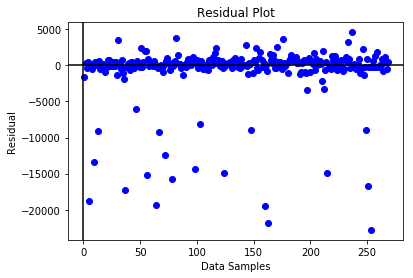

In [33]:
# Final model predictions on Test Data:
print("\nStats on Test Data for final model:-\n\n\t", modelSelected)
predictions = gscv.predict(X_testRFE)
print("\nMean Absolute Error(MAE) for {} on Test Data: {}\n".format(modelName, mean_absolute_error
                                                                             (Y_testKFold, predictions)))

print("Coefficient of determination(R^2) score for {} on Test Data: {}\n".format(modelName, modelSelected.score
                                                                                (X_testRFE, Y_testKFold)))
#Residual Plot:
fig, ax = plt.subplots()
ax.scatter(np.arange(1, len(Y_testKFold)+1), predictions-Y_testKFold, color='blue')
ax.set_title("Residual Plot")
ax.set_xlabel("Data Samples")
ax.set_ylabel("Residual")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot()
plt.show()